interactive(children=(IntSlider(value=500, description='BirthRate', max=1000, step=50), Output()), _dom_classe…

interactive(children=(IntSlider(value=500, description='DeathRate', max=1000, step=50), Output()), _dom_classe…

Button(description='next', style=ButtonStyle())

Output()

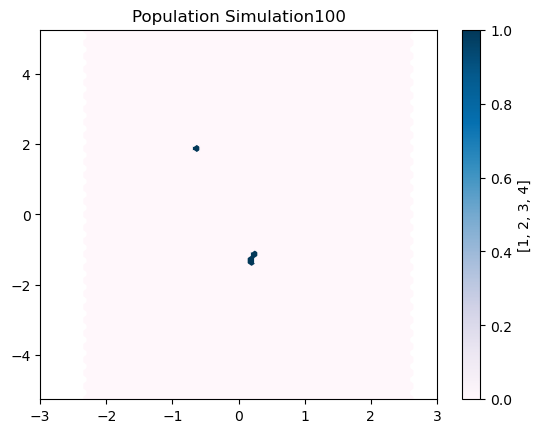

850 150
(100,)
(800,)
(800,)


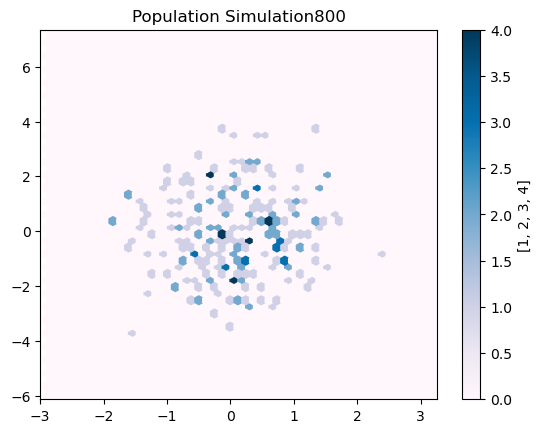

850 150
(800,)
(1500,)
(1500,)


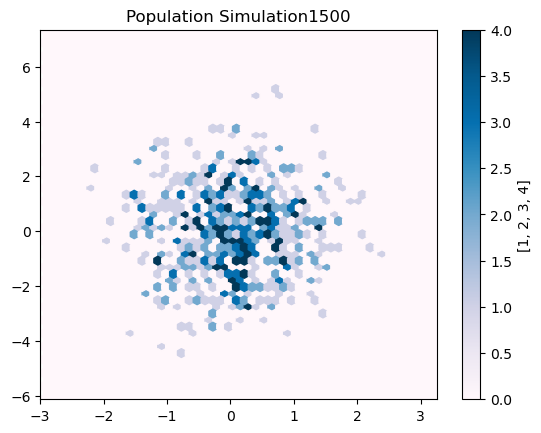

900 0
(1500,)
(2400,)
(2400,)


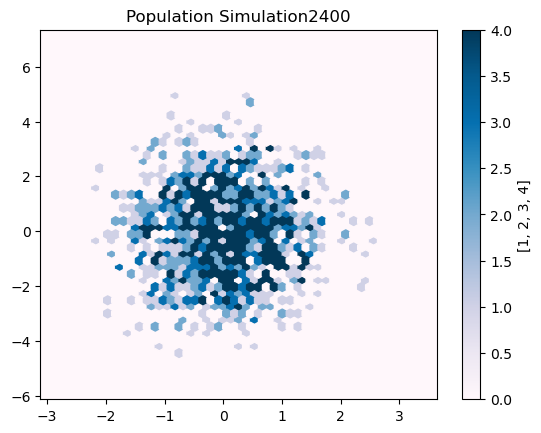

900 0
(2400,)
(3300,)
(3300,)


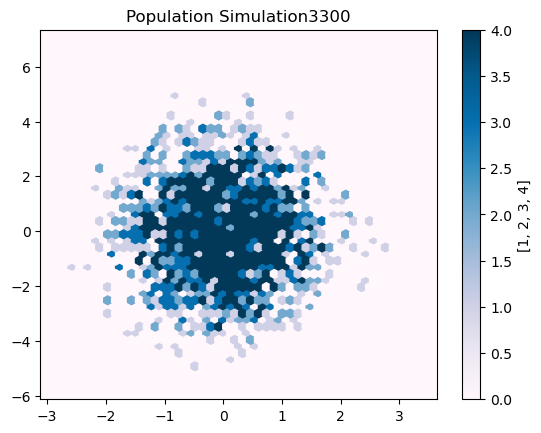

900 0
(3300,)
(4200,)
(4200,)


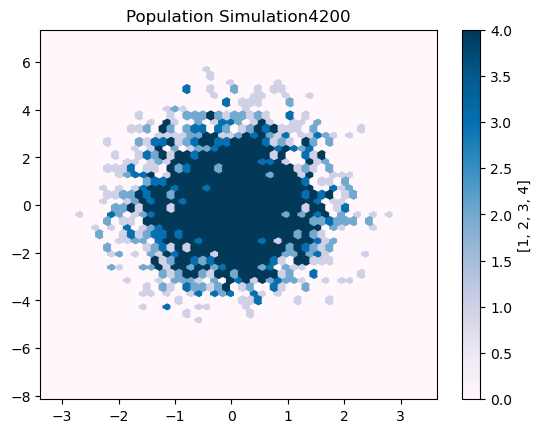

900 200
(4200,)
(4900,)
(4900,)


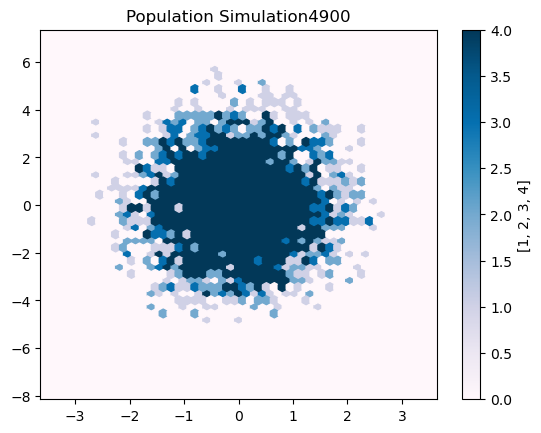

In [3]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
import ipywidgets as widgets

BR = 0
DR = 0
#Birth and Death Rate widgets
#Birth Rate
def f(BirthRate):
    global BR
    BR=0
    BR+= BirthRate
    return(BirthRate)
widgets.interact(f, BirthRate=widgets.IntSlider(min=0, max=1000, step=50, value=500))
#Death Rate
def g(DeathRate):
    global DR
    DR=0
    DR += DeathRate
    return(DeathRate)
widgets.interact(g, DeathRate=widgets.IntSlider(min=0, max=1000, step=50, value=500))
#Next Button
next_button = widgets.Button(description='next')
output = widgets.Output()
display(next_button, output)

#Population Total 
pop = 100
#Normal Distribution to give cluster shape
x = np.random.standard_normal(pop) 
y = 2 * np.random.standard_normal(pop) 
z =[1, 2, 3, 4] 

#Setting bounds to be atleast 6,6 or adjusted to larger clusters
xmin = min(-3, x.min())
xmax = max(3, x.max()) 
ymin = min(-3, y.min()) 
ymax = max(3, y.max()) 
    
hb = plt.hexbin(x, y, gridsize = 50, 
               bins = z, cmap ='PuBu') 
    
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
    
cb = plt.colorbar(hb) 
cb.set_label(z)
plt.title('Population Simulation' + str(pop))
  
plt.show()

def step(out):
    plt.clf()
    global pop, x, y, BR, DR
    #Population Change
    print(BR, DR)
    popchange = (BR-DR)    
    pop+=popchange
    #BR=0
    #DR=0
    #Add data to current data
    #Positive Change
    print(x.shape)
    if popchange >= 0:
        ix = np.random.standard_normal(popchange) 
        iy = 2 * np.random.standard_normal(popchange) 
        #update plot
        x=np.append(x, ix)
        y=np.append(y, iy)
        print(x.shape)
    
    #Negative change
    if(popchange < 0):
        for i in range(abs(popchange)):
            np.delete(x, -1, 0)
            np.delete(y, -1, 0)
            #x= x[:-1]
            #y= y[:-1]

    #Making plot fit properly
    print(x.shape)
    xmin = min(-3, x.min())
    xmax = max(3, x.max()) 
    ymin = min(-3, y.min()) 
    ymax = max(3, y.max()) 
    
    #Hexbin plot
    hb = plt.hexbin(x, y, gridsize = 50, 
                   bins = z, cmap ='PuBu') 
    #Using x and y values to correct size
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    cb = plt.colorbar(hb) 
    cb.set_label(z)
    plt.title('Population Simulation' + str(pop))
    #save/show plot
    plt.show()

next_button.on_click(step)